In [6]:
#import needed to call the database 
import pandas as pd
#importing the libraries required to characterise and visualise the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [7]:
#calling the csv file
apsfailureset_df=pd.read_csv("apsfailureset.csv")

In [8]:
#start of data set 
apsfailureset_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [9]:
#End of data set
apsfailureset_df.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [10]:
#shape of data set
apsfailureset_df.shape

(60000, 171)

In [11]:
#shape of data set
apsfailureset_df.shape[0]

60000

In [12]:
#Describing the type of data 
apsfailureset_df.describe

<bound method NDFrame.describe of       class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_0

In [13]:
#checking to see missing data 
apsfailureset_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### Replace na with NaN
This will allow us to drop the Null cells and only use the data that is reliable

In [14]:
# Replace 'na' with None
apsfailureset_df.replace('na', np.nan, inplace=True)
apsfailureset_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


### Drop rows that have na cells
This will provide us with cleaner data that we can rely on in our analysis

In [15]:
# Remove rows with null values
apsfailureset_df_cleaned = apsfailureset_df.dropna(axis=0)
apsfailureset_df_cleaned

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,neg,31300,0,784,740,0,0,0,0,0,...,798872,112724,51736,7054,6628,27600,2,2,0,0
179,neg,97000,0,378,160,0,0,0,0,0,...,1078982,313334,511330,552328,871528,871104,1980,42,0,0
225,neg,124656,2,278,170,0,0,0,0,0,...,1205696,866148,697610,700400,1900386,437532,3680,0,0,0
394,pos,281324,2,3762,2346,0,0,4808,215720,967572,...,624606,269976,638838,1358354,819918,262804,2824,0,0,0
413,pos,43482,0,1534,1388,0,0,0,0,40024,...,497196,121166,202272,232636,645690,50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,neg,118028,0,740,714,618,690,0,0,0,...,838952,631338,541036,1285274,1832658,165838,3022,0,0,0
59562,neg,229916,0,616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59843,neg,224084,0,912,766,0,0,0,0,0,...,413576,209524,469894,2233992,5933084,364450,12422,0,0,0
59870,neg,197332,0,658,616,216,346,0,0,0,...,73940,49896,90454,575264,104600,10352,36,0,0,0


In [16]:
#information on the data distriution relationships
apsfailureset_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, 16 to 59950
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 794.2+ KB


This is to find the number of duplicates

In [17]:
apsfailureset_df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool>

In [18]:
#using PCA for dimensionally reduction 
x = apsfailureset_df.drop(columns=['class']) #class is the target variable 

In [19]:
x

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,NaN,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,NaN,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,NaN,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [20]:
# removing duplicates in the data set 
# There is no duplicates
x = x.drop_duplicates()
# display how many duplicates before and after data cleansing is performed
before_duplicates = x.shape[0]
after_duplicates = x.shape[0]
#calculate the number of duplicates removed from dataset 
duplicates_removed = before_duplicates - after_duplicates



#print the results 
print(f"Number of Duplicates removed: {duplicates_removed}")

Number of Duplicates removed: 0


### EDA Visualizations
1. Histogram and Density plot

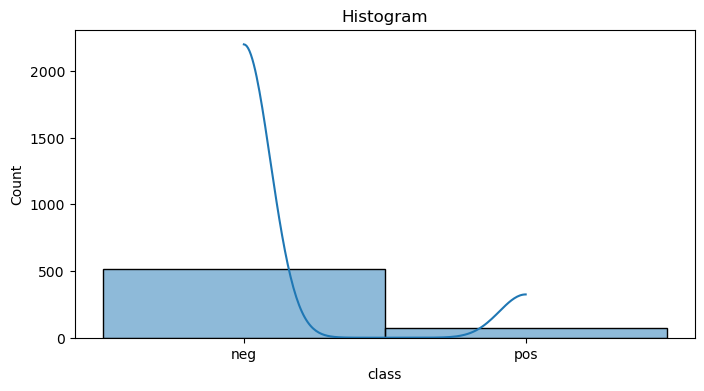

In [21]:
Histograms and Density Plots:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of a numeric column 'class'
plt.figure(figsize=(8, 4))
sns.histplot(data=apsfailureset_df_cleaned, x='class', kde=True)
plt.title('Histogram')
plt.show()


## Histogram reading
This visualization shows us that the failures for components not related to the APS are much larger than failures for a specific component of the APS system.

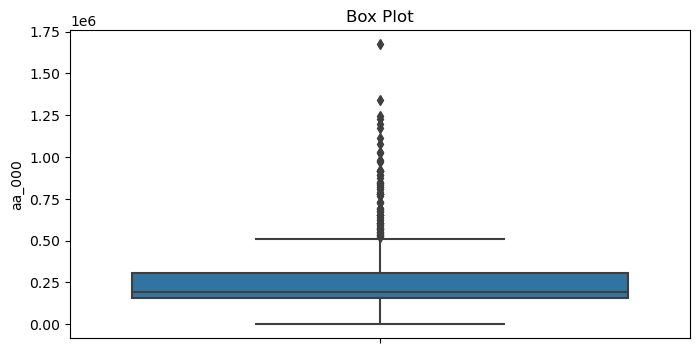

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of a numeric column 'class'
plt.figure(figsize=(8, 4))
sns.boxplot(data=apsfailureset_df_cleaned, y='aa_000')
plt.title('Box Plot')
plt.show()


### Histograms showing data visualisation for column aa_000 vs class
This visualisation compares data in one column when class is pos or neg

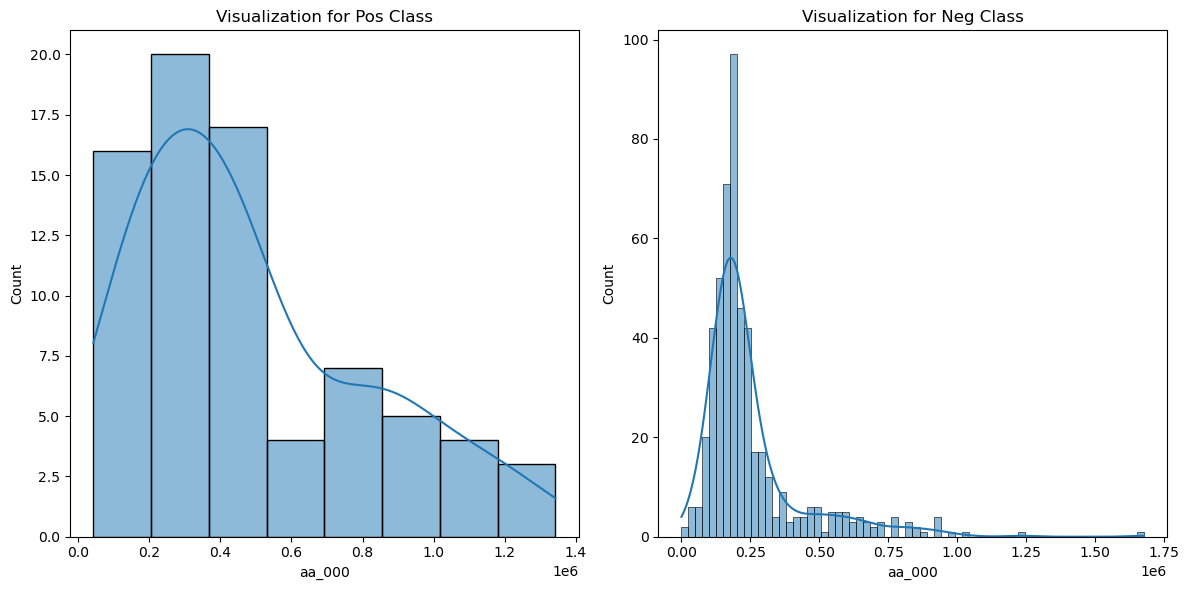

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df = apsfailureset_df_cleaned
# Filter the DataFrame for 'pos' class
df_pos = df[df['class'] == 'pos']

# Filter the DataFrame for 'neg' class
df_neg = df[df['class'] == 'neg']

# Create visualizations for the 'column_to_visualize' for both 'pos' and 'neg' classes
plt.figure(figsize=(12, 6))

# Visualization for 'pos' class
plt.subplot(1, 2, 1)
sns.histplot(data=df_pos, x='aa_000', kde=True)
plt.title('Visualization for Pos Class')

# Visualization for 'neg' class
plt.subplot(1, 2, 2)
sns.histplot(data=df_neg, x='aa_000', kde=True)
plt.title('Visualization for Neg Class')

plt.tight_layout()
plt.show()


In [47]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# drop class column to retain only numerical values
df_without_class = apsfailureset_df_cleaned.drop(columns=['class'])

scaler = StandardScaler()
df_without_class_scaled = scaler.fit_transform(df_without_class)

# Create a PCA object and specify the desired explained variance ratio
pca = PCA(n_components=0.995)  # Retain 99.5% of variance

# Fit the PCA model to your data
df_pca = pca.fit_transform(df_without_class_scaled)

# Get the number of components that retain 99.5% variance
num_components = df_pca.n_components_

print("Minimum number of features for retaining 99.5% variance in the data:", num_components)


Minimum number of features for retaining 99.5% variance in the data: 98


In [49]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=num_components)

# Fit PCA on your data
pca.fit(df_without_class)

# Transform your data to reduce dimensions
X_reduced = pca.transform(df_without_class)

X_reduced

array([[-2.44018860e+08, -6.19379236e+07, -1.21878921e+07, ...,
         9.87245918e+03,  1.25771642e+04,  4.64166405e+02],
       [-2.44089345e+08, -5.56674979e+07, -1.26973411e+07, ...,
        -7.09967946e+03, -1.22103039e+03,  9.05386308e+03],
       [-2.45318047e+08,  1.95938389e+07, -3.05381327e+07, ...,
        -1.83350653e+04,  1.95592724e+03,  1.63339625e+04],
       ...,
       [-2.44429030e+08, -4.82454313e+06, -1.60571653e+07, ...,
        -2.26490125e+04, -2.71202923e+04,  7.06806777e+04],
       [-2.43877367e+08, -6.36090580e+07, -2.15532620e+07, ...,
         1.57911856e+04, -1.75448938e+04, -4.51825789e+03],
       [-2.44455538e+08, -4.25875137e+07, -8.17044462e+06, ...,
        -3.27450024e+03,  3.65759159e+03,  2.09416642e+04]])

In [50]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

Explained variance by each component: [9.61167189e-01 2.88259339e-02 4.24681436e-03 2.59310987e-03
 1.10948207e-03 9.23425537e-04 4.06339304e-04 1.87578241e-04
 1.11624911e-04 8.63104065e-05 6.87428984e-05 5.57839786e-05
 5.07760648e-05 3.56144059e-05 2.17934274e-05 1.82035296e-05
 1.10765041e-05 1.06278915e-05 1.02056746e-05 7.25147405e-06
 5.62034274e-06 5.12200704e-06 4.36937460e-06 4.13001781e-06
 3.49124146e-06 2.92425751e-06 2.88392455e-06 2.51937545e-06
 2.19477039e-06 2.09448647e-06 1.68385958e-06 1.65844480e-06
 1.53121394e-06 1.29328291e-06 1.22757666e-06 1.15415020e-06
 9.50908602e-07 8.38771717e-07 7.43925109e-07 6.98386440e-07
 6.34714210e-07 6.16141680e-07 4.72591577e-07 4.36131803e-07
 2.70492096e-07 2.58903204e-07 2.36269341e-07 2.18932389e-07
 1.90576426e-07 1.71330000e-07 1.50557552e-07 1.47422958e-07
 1.39969468e-07 1.31676949e-07 1.13294395e-07 1.06458722e-07
 8.01105739e-08 7.86152760e-08 6.68426050e-08 6.42835691e-08
 5.67525531e-08 4.52575955e-08 3.81004289e-08 3

In [52]:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=class, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


SyntaxError: invalid syntax (2543549723.py, line 4)

In [22]:
#reducing the data to determine the number of features
pca = PCA()


### Pairplot visualisation

In [23]:
pca.fit(x)
cumultive_

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values